### Data Modelling 

There can be two approaches to build sales forecast:
* Build Separate forecast model for each store 
* Combine sales of each store(summing up sales of every store on each day) to build a single forecast model for all stores.

The latter one is more easier to start with.


#### 1.Loading dataset and Cleaning Process

In [1]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import random 

In [2]:
#importing the datasets
train_data = pd.read_csv('train.csv')
features_data=pd.read_csv('features.csv')
stores_data=pd.read_csv('stores.csv')

In [3]:
#merging the three datasets  
df=train_data.merge(features_data,how='left',on=['Store','Date'])
print(df.shape)
df.head(5)

(421570, 15)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df=df.merge(stores_data,how='left',on='Store')
print(df.shape)
df.head(5)

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [5]:
#Check Nans
df.isna().sum(axis=0)

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [6]:
# Fill Nans with zero as Nans are present only in Markdowns where filling with zeroes is okay.
df_new=df.fillna(0)

In [7]:
df_new.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [8]:
#Since negative values exist in three columns,lets replace with zero
df_new.loc[df_new['Weekly_Sales'] < 0.0,'Weekly_Sales'] = 0.0
df_new.loc[df_new['MarkDown2'] < 0.0,'MarkDown2'] = 0.0
df_new.loc[df_new['MarkDown3'] < 0.0,'MarkDown3'] = 0.0

In [9]:
df_new.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


In [10]:
df_new.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.467250,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.032446,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [11]:
df_new=df_new.drop(['IsHoliday_y'], axis=1)
df_new.head(4)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315


The data is now clean and can be used for modelling.Since approach adopted by us is adding up sales of all stores for each day,prepare the dataset and try different modelling techniques.

In [12]:
ts = df_new.groupby('Date')['Weekly_Sales'].sum().reset_index()
ts.head(5)

,Date,Weekly_Sales
0,2010-02-05,49750875.98
1,2010-02-12,48336800.10
2,2010-02-19,48277902.33
3,2010-02-26,43970440.65
4,2010-03-05,46872715.16


In [13]:
ts = ts.set_index('Date')
ts.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
       '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
      dtype='object', name='Date', length=143)

In [14]:
ts.index.name = 'Date'

In [15]:
ts.dtypes

Weekly_Sales    float64
dtype: object

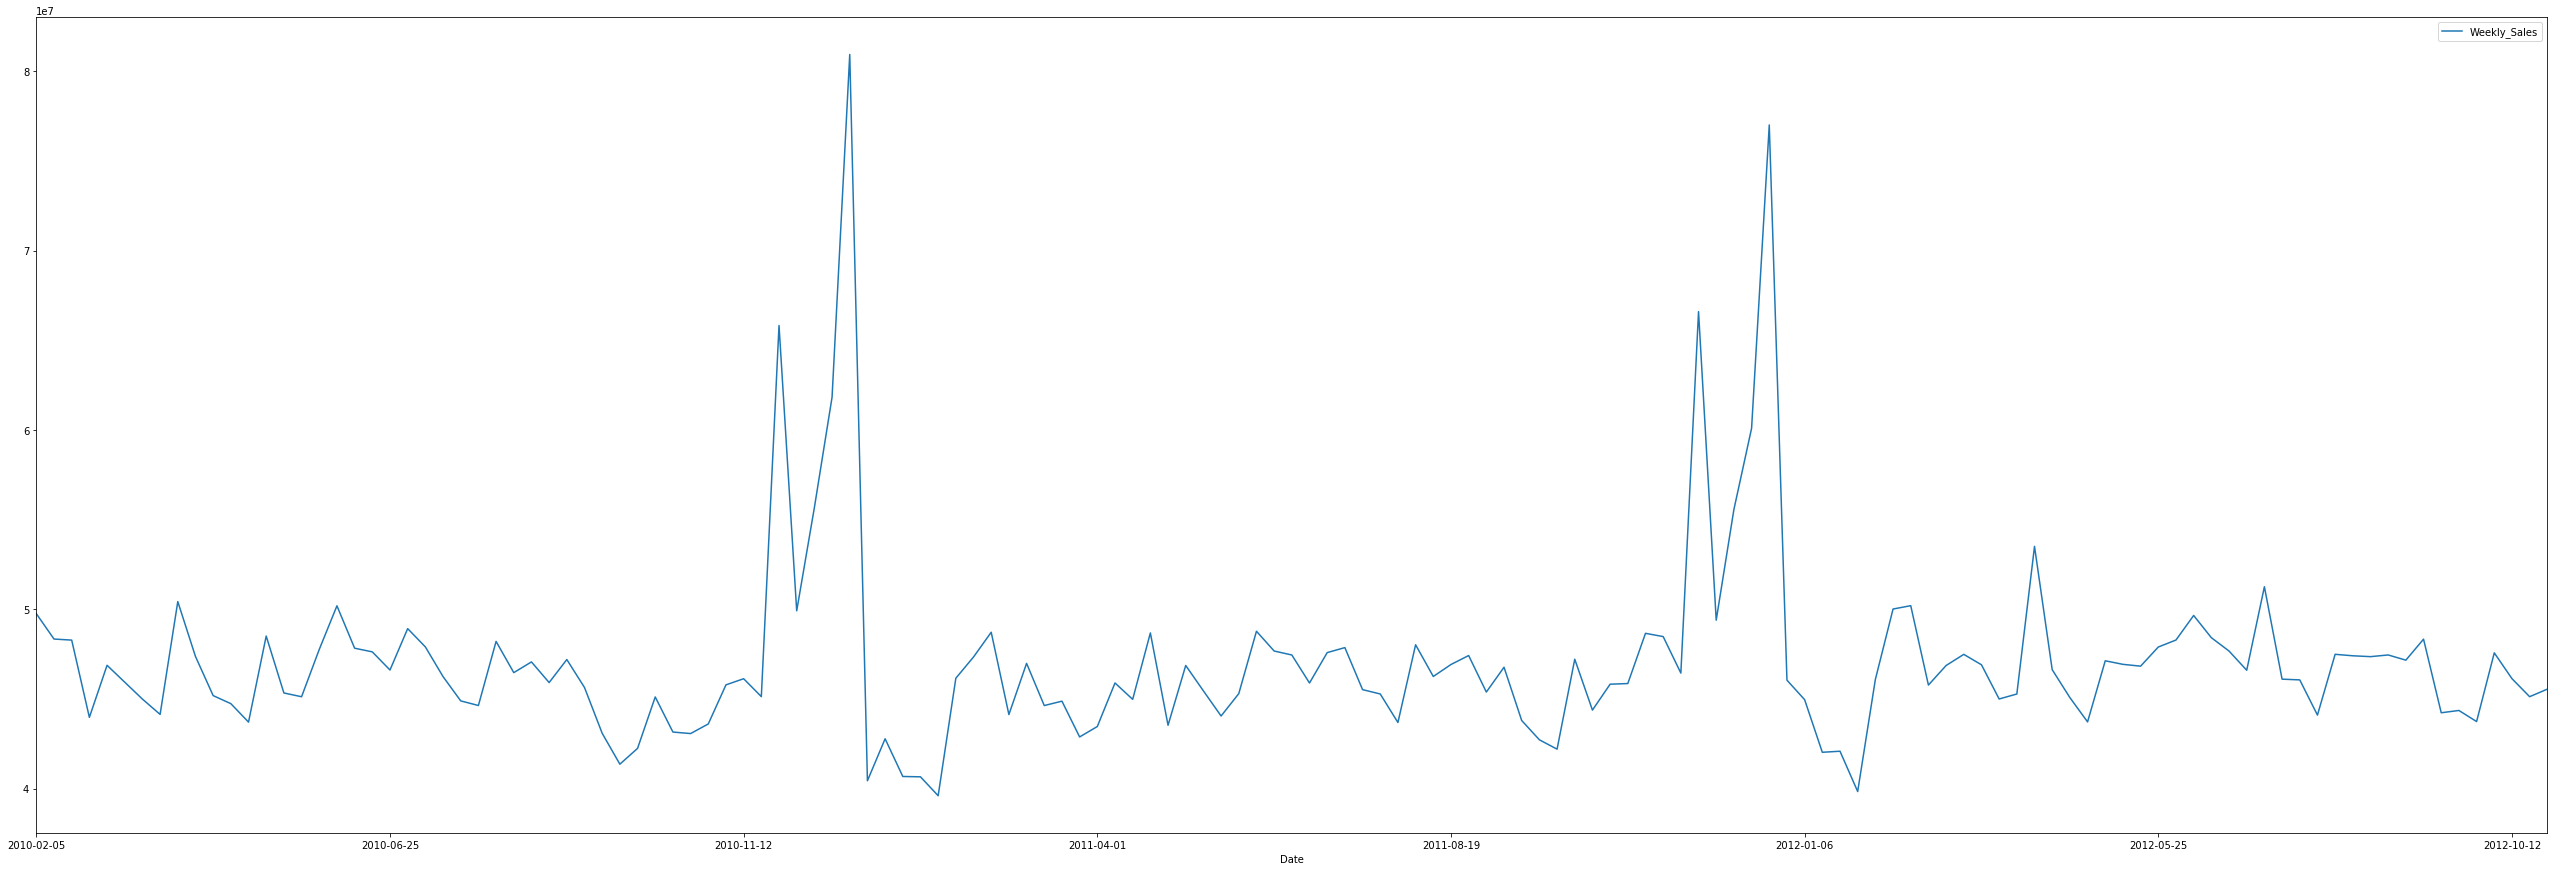

In [16]:
ts.plot(figsize=(45,15))

We would be applying different techniques for modelling.Time Series techniques assume data to be stationary before modelling.So lets check stationarity of our data.If the data is not stationary,lets applying transformation methods to improve the stationarity of data.

A TS is said to be stationary if its statistical properties such as mean, variance remain constant over time.Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future.


There are 2 major reasons behind non-stationarity of a TS:
1. Trend – varying mean over time.
2. Seasonality – variations at specific time-frames.

We will be checking for stationarity of data using two methods:
* KPSS

Null Hypothesis: The process is trend stationary.<br>

Alternate Hypothesis: The series has a unit root (series is not stationary).<br>

<br>

* Dickey Fuller Test

Null Hypothesis: The series has a unit root (value of a =1)<br>

Alternate Hypothesis: The series has no unit root.<br>

In [17]:
#Define function for kpss test 
from statsmodels.tsa.stattools import kpss 

def kpss_test(timeseries):
    print ('Results of KPSS Test:')    
    kpsstest = kpss(timeseries, regression='c')   
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])    
    for key,value in kpsstest[3].items():   
        kpss_output['Critical Value (%s)'%key] = value  
        print (kpss_output)
        break;

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput,dftest)

In [19]:
kpss_test(ts['Weekly_Sales'])

Results of KPSS Test:
Test Statistic           0.066981
p-value                  0.100000
Lags Used               14.000000
Critical Value (10%)     0.347000
dtype: float64


/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Since p value is greater than .05,we cannot reject null hypothesis.Hence the data is stationary.

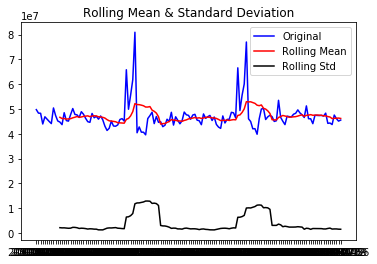

Results of Dickey-Fuller Test:
Test Statistic                -5.908398e+00
p-value                        2.674607e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-5.908397717797423, 2.674606788825972e-07, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 4314.455596795056)


In [20]:
test_stationarity(ts['Weekly_Sales'])

Since p value is lesser than .05,we can reject null hypothesis and accept the alternate hypothesis that data is stationary.

Both tests indicate that data is stationary.This was visually observed as well-there was no increasing or decreasing trend as years progress also there was no spikes observed in particular seasons.While working on weekly sales prediction,this is expected.The trends may be observed if monthly sales prediction is plotted.But here the dataset is for just for 2 years so monthly sales prediction would not be accurate as size of dataset is small.

As the stationarity of the datasets increases ,the more accurate the predictions would be.
So lets try few transformation(log) and shifting procedures and check if its improving stationarity.

**Eliminating Seasonality & Trends**
* Differencing : This is specifically to remove the trend in the time series by differencing from the shifted version of same time series
* Decomposing : It decomposes the time series into 3 parts such as Trends,Seasonality and Residual.Predictions are done using residuals and then trends and seasonality is added to predictions.


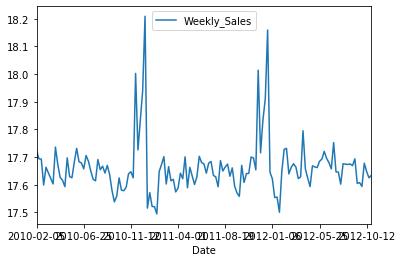

In [21]:
ts_log = np.log(ts)
ts_log.plot()

In [22]:
ts.index = pd.DatetimeIndex(ts.index.values,
                               freq=pd.infer_freq(ts.index))
ts_log.index = pd.DatetimeIndex(ts_log.index.values,
                               freq=pd.infer_freq(ts_log.index))

In [23]:
print(type(ts))
ts.head(5)

<class 'pandas.core.frame.DataFrame'>


,Weekly_Sales
2010-02-05,49750875.98
2010-02-12,48336800.10
2010-02-19,48277902.33
2010-02-26,43970440.65
2010-03-05,46872715.16


In [24]:
ts_log.head(4)

,Weekly_Sales
2010-02-05,17.722539
2010-02-12,17.693704
2010-02-19,17.692485
2010-02-26,17.599028


In [25]:
print(type(ts_log))

<class 'pandas.core.frame.DataFrame'>


In [26]:
kpss_test(ts_log['Weekly_Sales'])

Results of KPSS Test:
Test Statistic           0.079436
p-value                  0.100000
Lags Used               14.000000
Critical Value (10%)     0.347000
dtype: float64


/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


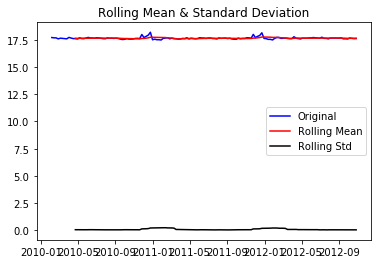

Results of Dickey-Fuller Test:
Test Statistic                -6.332944e+00
p-value                        2.876466e-08
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64 (-6.332943701332506, 2.876466204721774e-08, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, -255.70995745325047)


In [27]:
test_stationarity(ts_log['Weekly_Sales'])

We observe that test statistic values having changed but p values remain same.

#### Shifting

In [28]:
ts_log_diff = ts_log - ts_log.shift()
print(type(ts_log_diff))
ts_log_diff.head(5)

<class 'pandas.core.frame.DataFrame'>


,Weekly_Sales
2010-02-05,NaN
2010-02-12,-0.028835
2010-02-19,-0.001219
2010-02-26,-0.093456
2010-03-05,0.063918


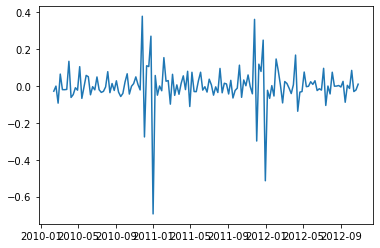

In [29]:
plt.plot(ts_log_diff)

In [30]:
ts_log_diff = ts_log_diff[1:]

In [31]:
type(ts_log_diff)

pandas.core.frame.DataFrame

In [32]:
ts_log_diff.tail(5)

,Weekly_Sales
2012-09-28,-0.014059
2012-10-05,0.083975
2012-10-12,-0.030701
2012-10-19,-0.022060
2012-10-26,0.009307


#### Decomposition

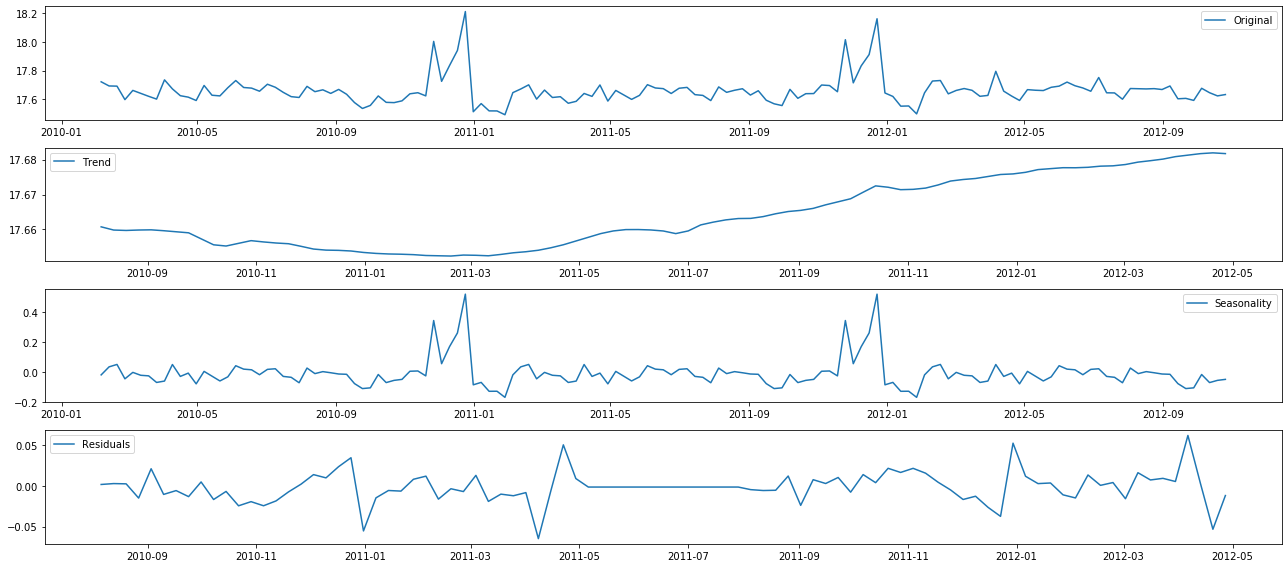

In [33]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
#rcParams change the bydefault size of figure
rcParams['figure.figsize'] = 18, 8

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

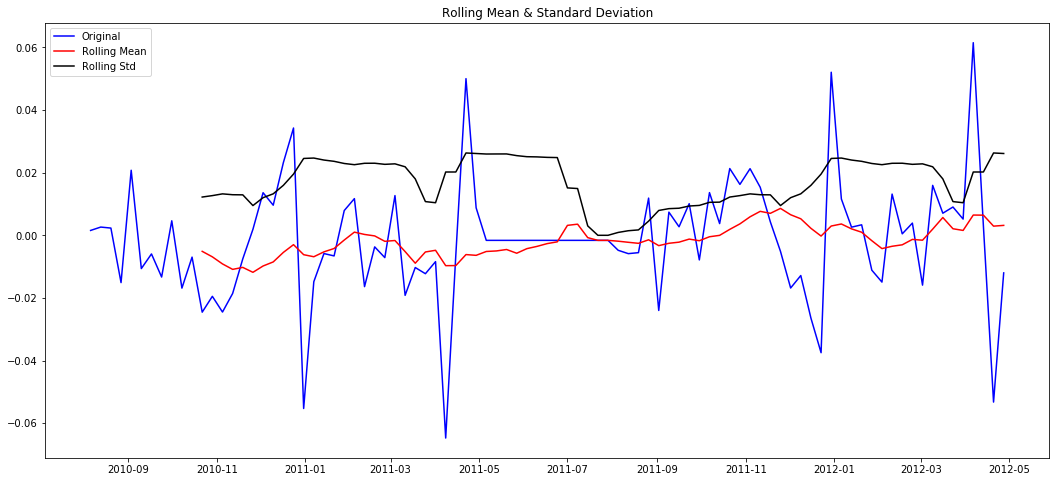

Results of Dickey-Fuller Test:
Test Statistic                -6.825012e+00
p-value                        1.957951e-09
#Lags Used                     1.000000e+00
Number of Observations Used    8.900000e+01
Critical Value (1%)           -3.506057e+00
Critical Value (5%)           -2.894607e+00
Critical Value (10%)          -2.584410e+00
dtype: float64 (-6.825012061280381, 1.9579510475600415e-09, 1, 89, {'1%': -3.506057133647011, '5%': -2.8946066061911946, '10%': -2.5844100201994697}, -388.010530773228)


In [34]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose['Weekly_Sales'])

In [35]:
kpss_test(ts_log_decompose['Weekly_Sales'])

Results of KPSS Test:
Test Statistic           0.349389
p-value                  0.098970
Lags Used               12.000000
Critical Value (10%)     0.347000
dtype: float64


We observe that stationarity has improved because p value has changed from .1 to .09

/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


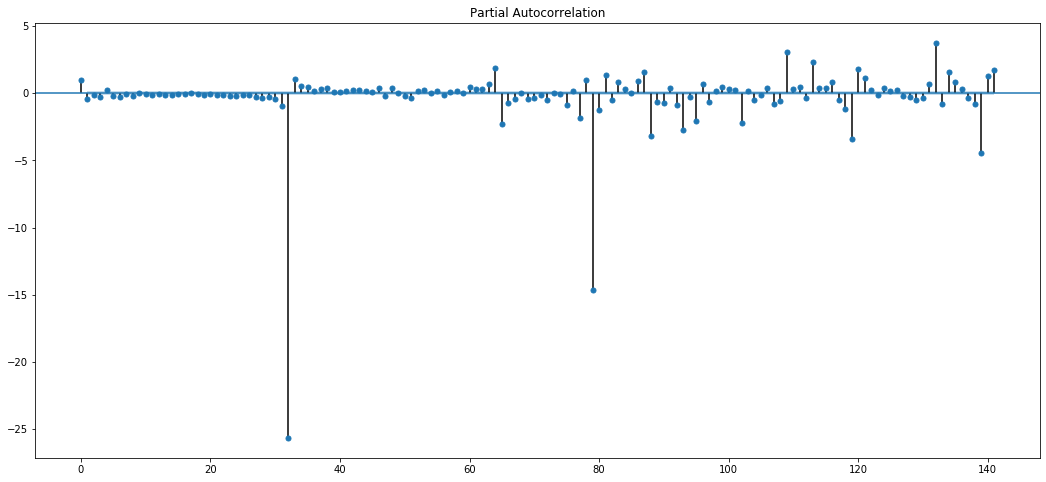

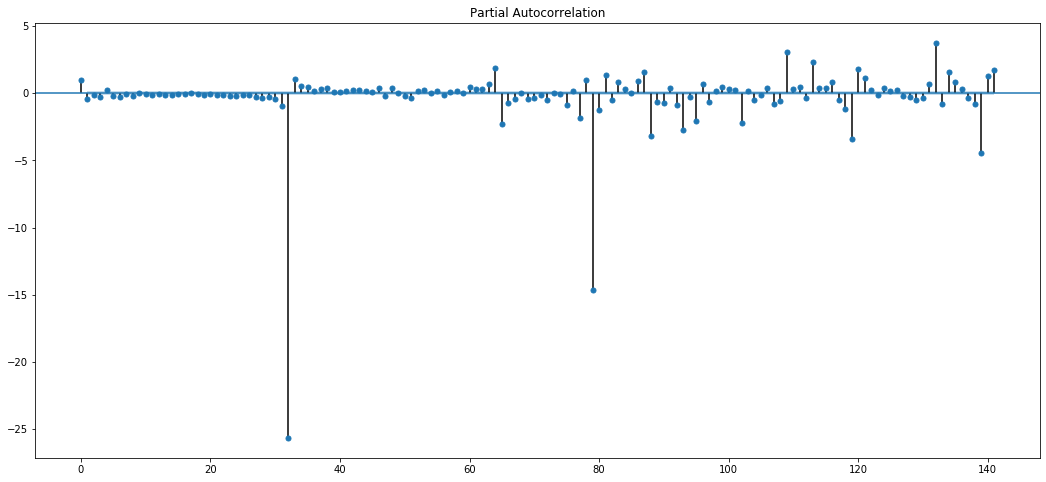

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ts_log_diff)

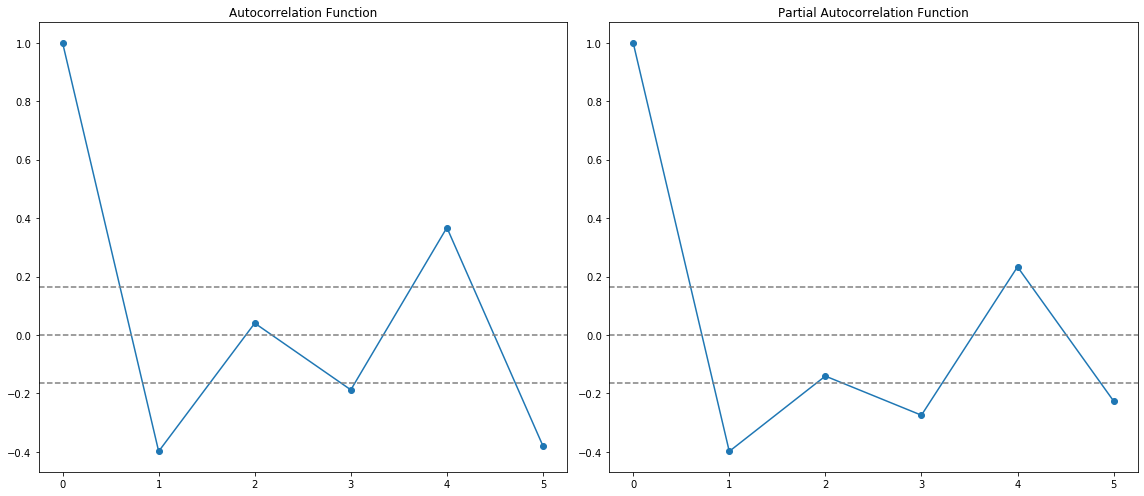

In [37]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=5)
lag_pacf = pacf(ts_log_diff, nlags=5, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

From the acf and pcf plots,we observe that the p and q values are 1 and 1(the nearest whole integers which cut the upper confidence limit).Combinations of 0,1,2 can be tried for p and q values to get optimal values with min AIC value

#### ARIMA

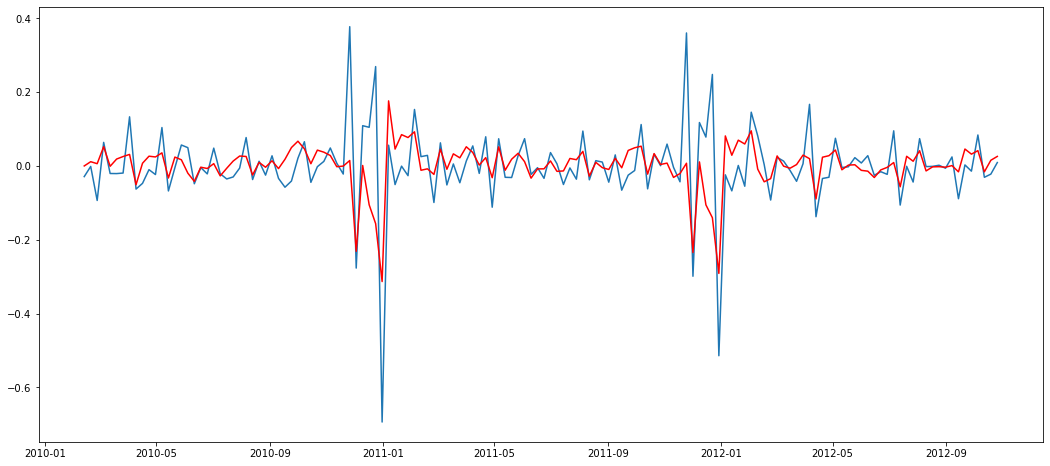

In [38]:
#Arima Model
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log_diff, order=(2, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [39]:
print(results_ARIMA.summary())

                              ARMA Model Results                              
Dep. Variable:           Weekly_Sales   No. Observations:                  142
Model:                     ARMA(2, 1)   Log Likelihood                 136.782
Method:                       css-mle   S.D. of innovations              0.091
Date:                Tue, 11 Jun 2019   AIC                           -263.565
Time:                        13:37:53   BIC                           -248.786
Sample:                    02-12-2010   HQIC                          -257.559
                         - 10-26-2012                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                6.77e-05      0.000      0.201      0.841      -0.001       0.001
ar.L1.Weekly_Sales     0.3344      0.083      4.011      0.000       0.171       0.498
ar.L2.Weekly_Sales  

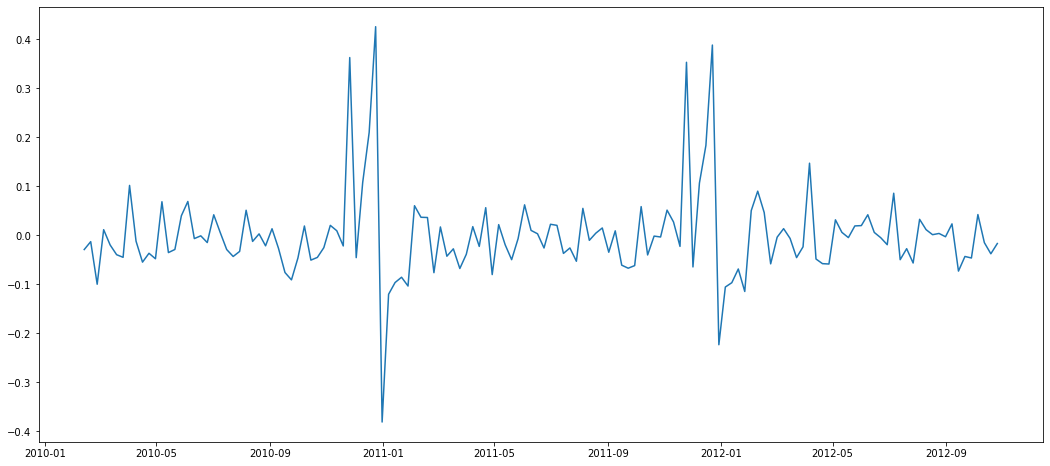

In [40]:
residuals=results_ARIMA.resid
plt.plot(residuals)

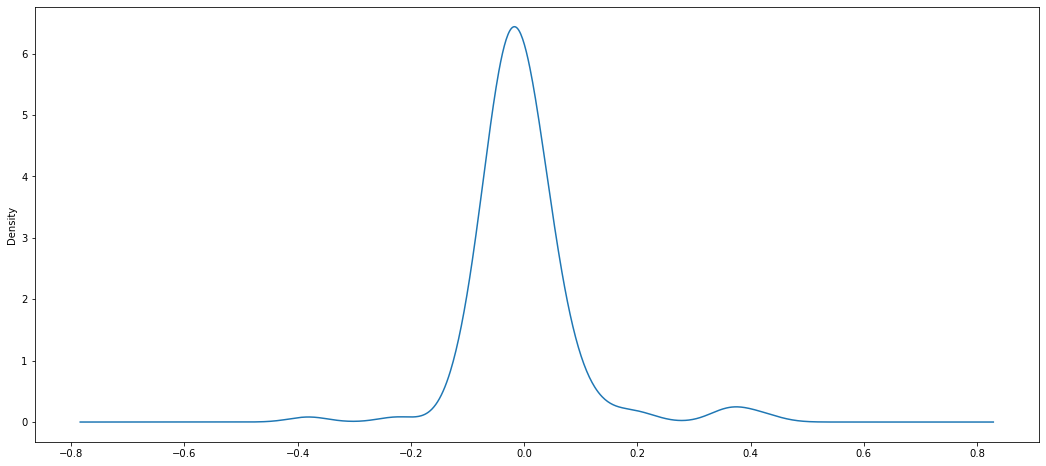

In [41]:
residuals.plot(kind='kde')

The residuals are noramlly distributed indicating that data is fit well.

In [42]:
#Finding sum of Residual Sum of Squares(RSS) for evaluation of ARIMA model
RSS = (results_ARIMA.fittedvalues-ts_log_diff['Weekly_Sales'])**2
RSS.fillna(0,inplace=True)
sum(RSS)

1.2006830606019085

In [43]:
results_ARIMA.fittedvalues.head(4)

2010-02-12    0.000068
2010-02-19    0.011579
2010-02-26    0.006205
2010-03-05    0.052292
Freq: W-FRI, dtype: float64

In [44]:
forecast = results_ARIMA.predict(start=142,end=159)#Predicting one year from 26-10-2012 to 27-12-2013
print(forecast.head(3))
print(forecast.tail(3))

2012-11-02    0.016884
2012-11-09    0.006900
2012-11-16    0.004553
Freq: W-FRI, dtype: float64
2013-02-15    0.000070
2013-02-22    0.000069
2013-03-01    0.000069
Freq: W-FRI, dtype: float64


/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [45]:
forecast_cumsum = forecast.cumsum()
forecast_cumsum.tail(3)

2013-02-15    0.034789
2013-02-22    0.034858
2013-03-01    0.034927
Freq: W-FRI, dtype: float64

In [46]:
rng = pd.date_range('2012-11-02', periods=17, freq='W-FRI')
rng

DatetimeIndex(['2012-11-02', '2012-11-09', '2012-11-16', '2012-11-23',
               '2012-11-30', '2012-12-07', '2012-12-14', '2012-12-21',
               '2012-12-28', '2013-01-04', '2013-01-11', '2013-01-18',
               '2013-01-25', '2013-02-01', '2013-02-08', '2013-02-15',
               '2013-02-22'],
              dtype='datetime64[ns]', freq='W-FRI')

In [47]:
forecast_log = pd.Series(17.62, index=rng)


In [48]:
forecast_log = forecast_log.add(forecast_cumsum,fill_value=0)

In [49]:
forecast_log.head(3)

2012-11-02    17.636884
2012-11-09    17.643784
2012-11-16    17.648337
Freq: W-FRI, dtype: float64

In [50]:
forecast_ARIMA = np.exp(forecast_log)

In [51]:
forecast_ARIMA .head(5)

2012-11-02    4.566688e+07
2012-11-09    4.598307e+07
2012-11-16    4.619292e+07
2012-11-23    4.630678e+07
2012-11-30    4.637423e+07
Freq: W-FRI, dtype: float64

In [52]:
results_ARIMA.fittedvalues

2010-02-12    0.000068
2010-02-19    0.011579
2010-02-26    0.006205
2010-03-05    0.052292
2010-03-12   -0.000844
2010-03-19    0.018755
2010-03-26    0.025583
2010-04-02    0.031313
2010-04-09   -0.050769
2010-04-16    0.007397
2010-04-23    0.026507
2010-04-30    0.024455
2010-05-07    0.035534
2010-05-14   -0.032572
2010-05-21    0.024099
2010-05-28    0.016791
2010-06-04   -0.019515
2010-06-11   -0.041672
2010-06-18   -0.003355
2010-06-25   -0.006819
2010-07-02    0.006335
2010-07-09   -0.026890
2010-07-16   -0.006292
2010-07-23    0.013307
2010-07-30    0.026950
2010-08-06    0.025762
2010-08-13   -0.024469
2010-08-20    0.009725
2010-08-27   -0.003457
2010-09-03    0.014078
                ...   
2012-04-06    0.019783
2012-04-13   -0.089278
2012-04-20    0.023729
2012-04-27    0.027877
2012-05-04    0.043311
2012-05-11   -0.010342
2012-05-18    0.002366
2012-05-25    0.003263
2012-06-01   -0.011842
2012-06-08   -0.014078
2012-06-15   -0.031263
2012-06-22   -0.010701
2012-06-29 

In [53]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

2010-02-12    0.000068
2010-02-19    0.011579
2010-02-26    0.006205
2010-03-05    0.052292
2010-03-12   -0.000844
Freq: W-FRI, dtype: float64


In [54]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

2010-02-12    0.000068
2010-02-19    0.011646
2010-02-26    0.017851
2010-03-05    0.070143
2010-03-12    0.069300
Freq: W-FRI, dtype: float64


In [55]:
predictions_ARIMA_log = pd.Series(ts_log.Weekly_Sales.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

2010-02-05    17.722539
2010-02-12    17.722606
2010-02-19    17.734185
2010-02-26    17.740390
2010-03-05    17.792682
Freq: W-FRI, dtype: float64

In [56]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

In [57]:
predwee=predictions_ARIMA-ts.Weekly_Sales

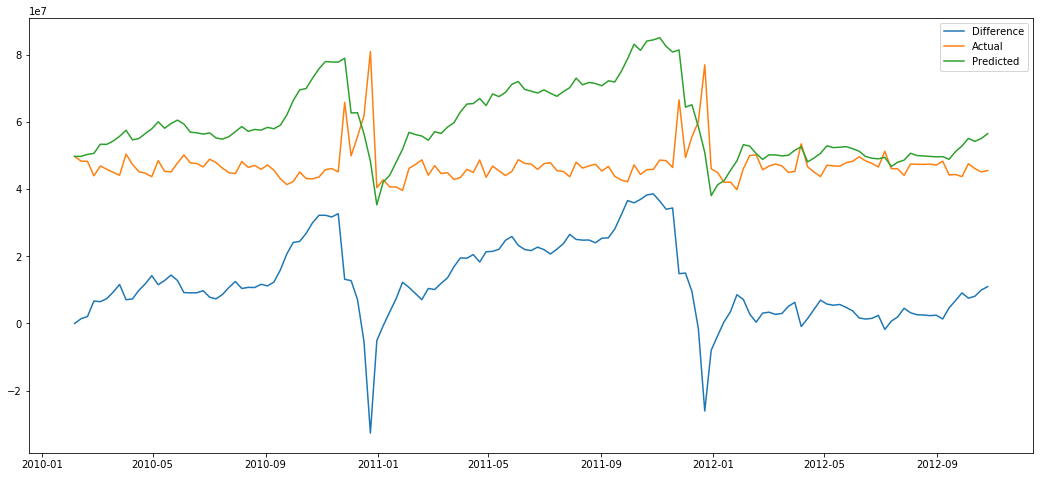

In [58]:
plt.plot(predwee,label='Difference')
plt.plot(ts,label='Actual')
plt.plot(predictions_ARIMA,label='Predicted')
plt.legend()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [60]:
def evaluate_forecast(y,pred):
    results = pd.DataFrame({'r2_score':r2_score(y, pred),
                           }, index=[0])
    results['mean_absolute_error'] = mean_absolute_error(y, pred)
    results['median_absolute_error'] = median_absolute_error(y, pred)
    results['mse'] = mean_squared_error(y, pred)
    results['msle'] = mean_squared_log_error(y, pred)
    results['rmse'] = np.sqrt(results['mse'])
    return results

In [61]:
evaluate_forecast(ts.Weekly_Sales, predictions_ARIMA)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,-8.726418,1.335017e+07,1.042385e+07,2.862643e+14,0.086613,1.691935e+07


In [62]:
train = ts[:int(0.75*(len(ts)))]
valid = ts[int(0.75*(len(ts))):]


Cleraly the ARIMA predictions are predicting thde peaks and trends but overall the metrics used  for evaluation of performance indicate that model is weak.The tuning of the parameters require more tweaking 

#### SARIMAX

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)

In [64]:
start_index = valid.index.min()
end_index = valid.index.max()

#Predictions
predictions = model_fit.predict(start=start_index, end=end_index)

/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [65]:
# report performance
from math import sqrt
mse = mean_squared_error(ts[start_index:end_index], predictions)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 4342328.836293193, MSE:18855819722503.39


In [66]:
evaluate_forecast(ts.Weekly_Sales[start_index:end_index], predictions)

,r2_score,mean_absolute_error,median_absolute_error,mse,msle,rmse
0,-3.875252,3.992136e+06,3.656638e+06,1.885582e+13,0.00813,4.342329e+06


Text(0.5, 1.0, 'RMSE: 4342328.8363')

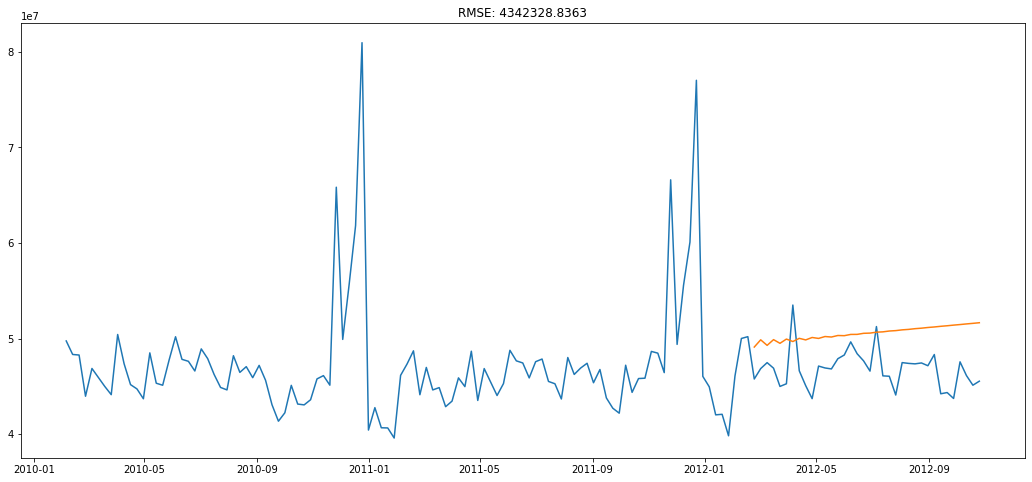

In [67]:
plt.plot(ts)
plt.plot(predictions)
plt.title('RMSE: %.4f'% rmse)

The plot of future preictions  indicates that SARIMAX gives an overall trend of future months but dips and peaks are not very accuarate.

#### Moving Average 

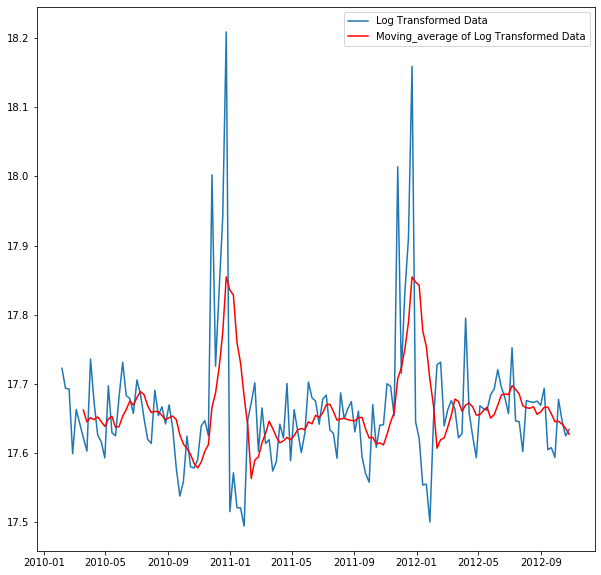

In [68]:
moving_avg= ts_log.rolling(window=7).mean()
plt.figure(figsize=[10,10])
plt.plot(ts_log,label='Log Transformed Data')
plt.plot(moving_avg, color='red',label='Moving_average of Log Transformed Data')
plt.legend()

The first values would be Nan which can be removed.
The moving avergae method captures the trend which is good.

In [69]:
moving_avg.head(10)

,Weekly_Sales
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,17.662171
2010-03-26,17.645059
2010-04-02,17.651099
2010-04-09,17.648373


In [70]:
moving_avg=moving_avg[7:]
moving_avg.head(3)

,Weekly_Sales
2010-03-26,17.645059
2010-04-02,17.651099
2010-04-09,17.648373


In [71]:
len(moving_avg)

136

**Prophet**

In [84]:
ts.head()

,Weekly_Sales
2010-02-05,49750875.98
2010-02-12,48336800.10
2010-02-19,48277902.33
2010-02-26,43970440.65
2010-03-05,46872715.16


In [85]:
train_prophet = pd.DataFrame()
train_prophet['ds'] = ts.index
train_prophet['y'] = ts.Weekly_Sales.values

In [86]:
train_prophet.head()

,ds,y
0,2010-02-05,49750875.98
1,2010-02-12,48336800.10
2,2010-02-19,48277902.33
3,2010-02-26,43970440.65
4,2010-03-05,46872715.16


In [87]:
from fbprophet import Prophet

In [88]:
m = Prophet(yearly_seasonality=True,weekly_seasonality=True)
m.fit(train_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [89]:
future = m.make_future_dataframe(periods=12,freq = 'MS')
future.tail(10)

,ds
145,2013-01-01
146,2013-02-01
147,2013-03-01
148,2013-04-01
149,2013-05-01
150,2013-06-01
151,2013-07-01
152,2013-08-01
153,2013-09-01
154,2013-10-01


In [90]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
150,2013-06-01,5.109280e+07,4.661577e+07,5.537808e+07
151,2013-07-01,5.138525e+07,4.685247e+07,5.561393e+07
152,2013-08-01,4.956918e+07,4.501376e+07,5.398228e+07
153,2013-09-01,5.094725e+07,4.657631e+07,5.566212e+07
154,2013-10-01,4.780874e+07,4.344475e+07,5.235889e+07


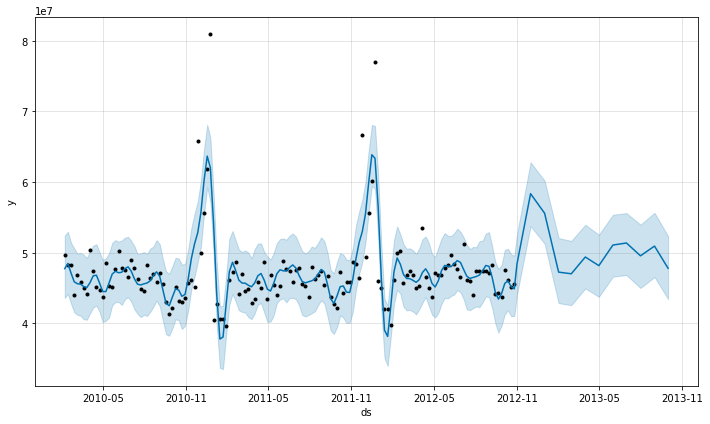

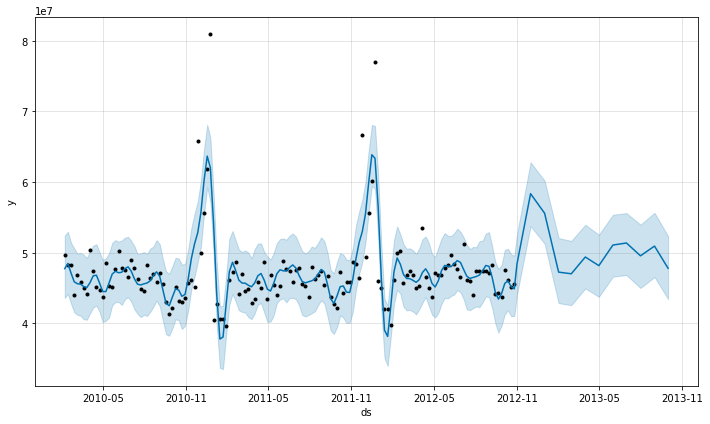

In [91]:
m.plot(forecast)

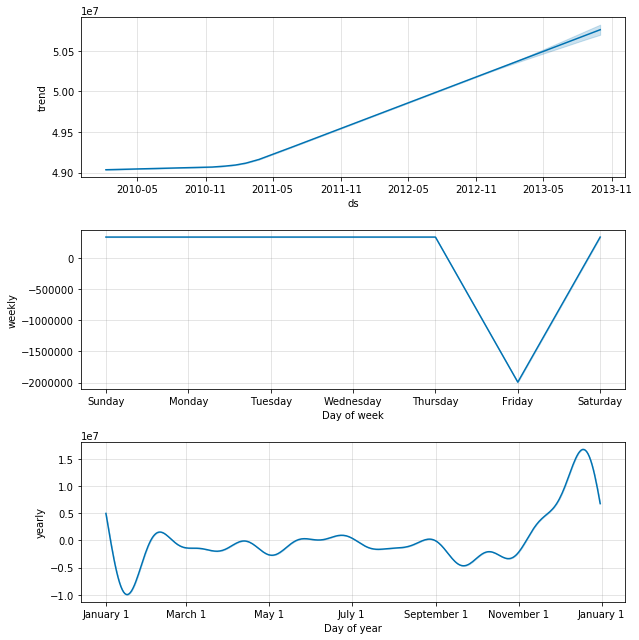

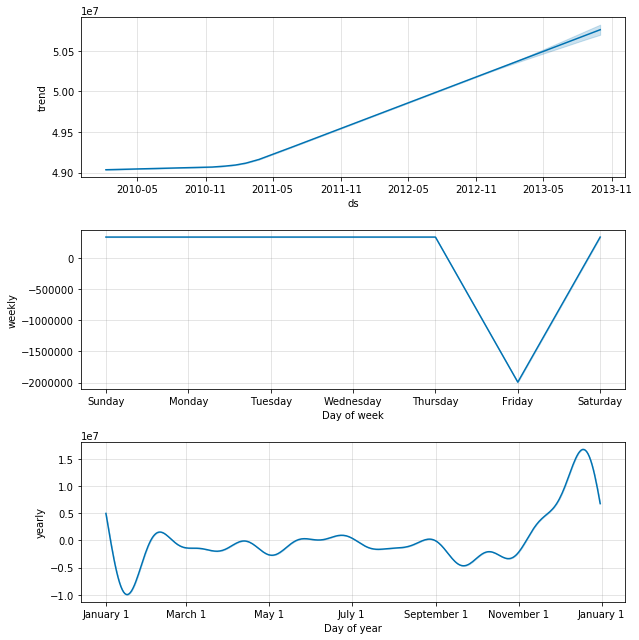

In [92]:
m.plot_components(forecast)

The Prophet method seems to predict well visually identifying peaks and dips.
* Yearly Seasonality-Sales increases over years
* Monthly Seasonality- January is the month with highest sales.
* Weekly Seasonality-Friday are generally low in sales.

Now lets tweek the parameters-Holidays-user defined holidays and using US holiday calender.

In [93]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [94]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [95]:
m = Prophet(yearly_seasonality=True,weekly_seasonality=True,holidays=holidays,interval_width=0.95)
m.add_country_holidays(country_name='US')
forecast = m.fit(train_prophet).predict(future)
m.train_holiday_names

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



0                         playoff
1                       superbowl
2                  New Year's Day
3       New Year's Day (Observed)
4     Martin Luther King, Jr. Day
5           Washington's Birthday
6                    Memorial Day
7                Independence Day
8     Independence Day (Observed)
9                       Labor Day
10                   Columbus Day
11                   Veterans Day
12                   Thanksgiving
13                  Christmas Day
14       Christmas Day (Observed)
15        Veterans Day (Observed)
dtype: object

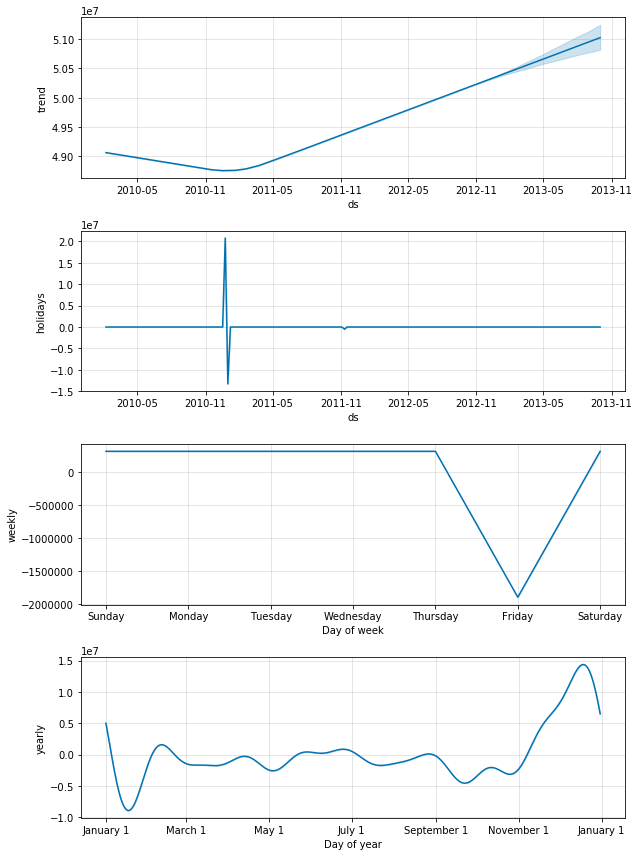

In [96]:
fig = m.plot_components(forecast)


In [97]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
150,2013-06-01,5.145035e+07,4.596727e+07,5.713515e+07
151,2013-07-01,5.166726e+07,4.631029e+07,5.725943e+07
152,2013-08-01,4.976712e+07,4.405396e+07,5.571080e+07
153,2013-09-01,5.106481e+07,4.509293e+07,5.609072e+07
154,2013-10-01,4.788967e+07,4.233422e+07,5.373375e+07


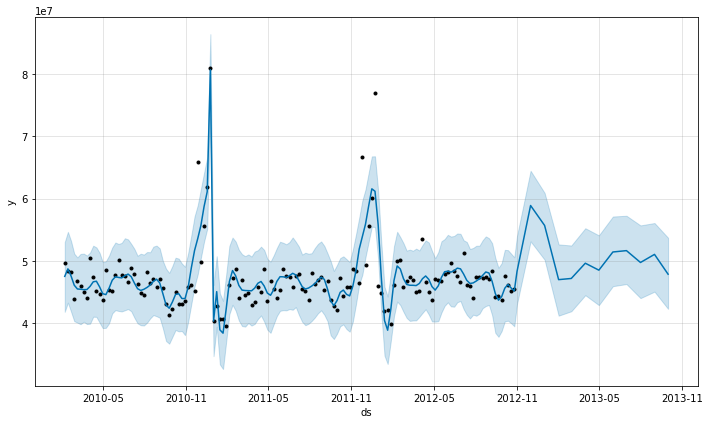

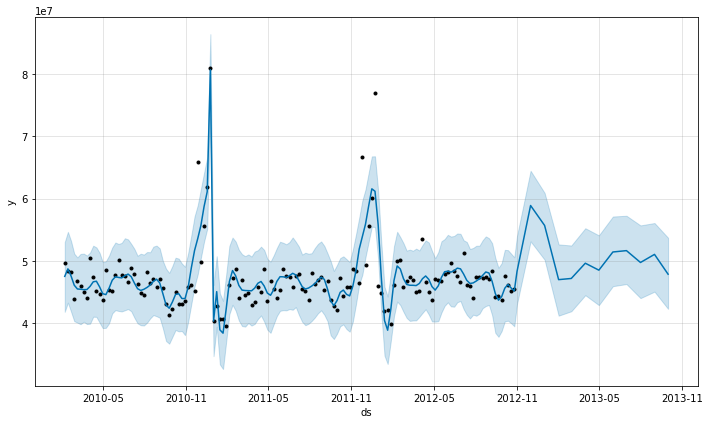

In [98]:
m.plot(forecast)

In [99]:
new_df = pd.DataFrame()
new_df['ds'] = ts.index
new_df['y'] = ts.Weekly_Sales.values
train_p=new_df[0:100]
test_p=new_df[100:]
m = Prophet(yearly_seasonality=True,weekly_seasonality=True,holidays=holidays,interval_width=0.90)#Setting 90% confidence interval
m.add_country_holidays(country_name='US')
m.fit(train_p)
future = m.make_future_dataframe(periods=12,freq = 'MS')
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



,ds,yhat,yhat_lower,yhat_upper
107,2012-08-01,4.874218e+07,4.359252e+07,5.369135e+07
108,2012-09-01,4.972200e+07,4.481266e+07,5.494020e+07
109,2012-10-01,4.614477e+07,4.096056e+07,5.118398e+07
110,2012-11-01,4.761290e+07,4.261412e+07,5.274558e+07
111,2012-12-01,5.817079e+07,5.299378e+07,6.328762e+07


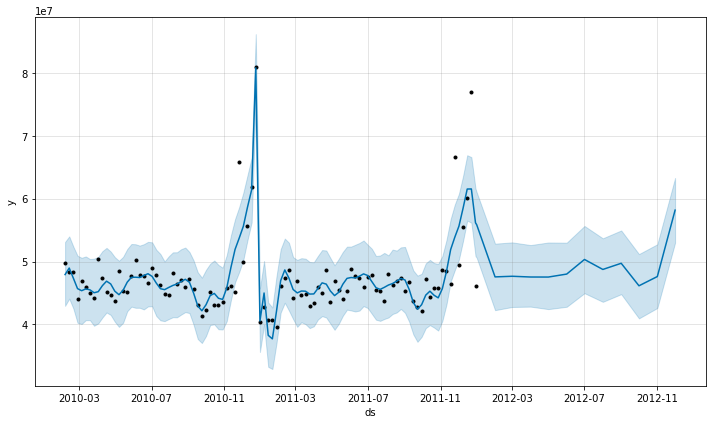

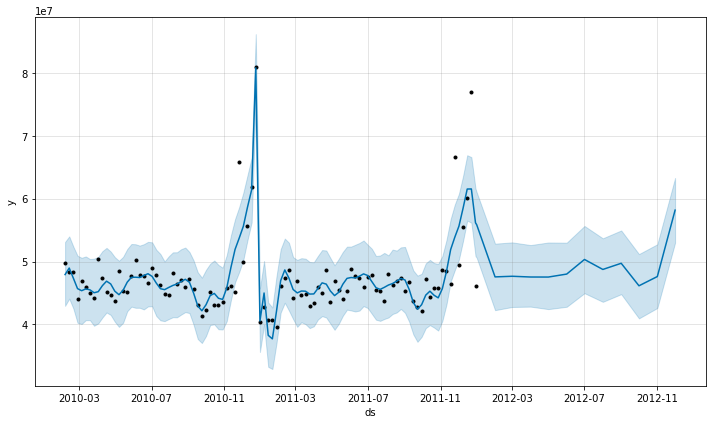

In [100]:
m.plot(forecast)

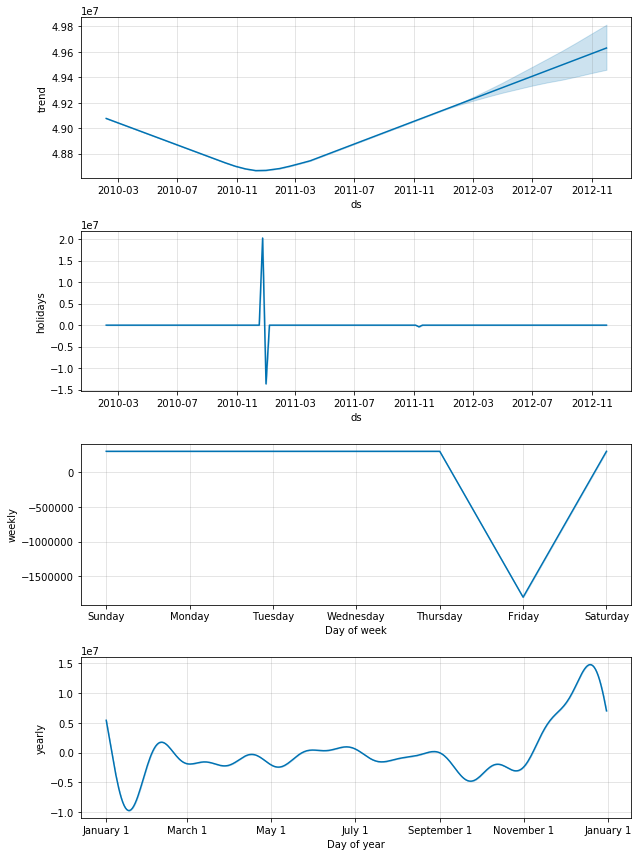

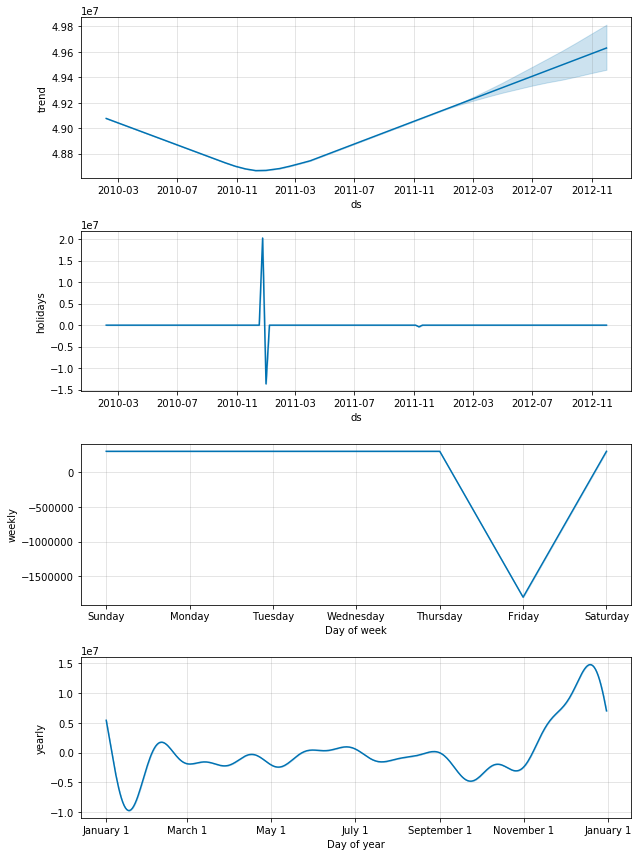

In [101]:
m.plot_components(forecast)

Text(0, 0.5, 'Sales')

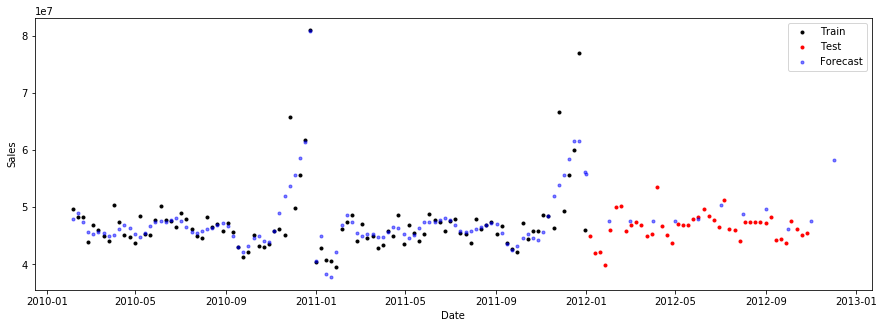

In [102]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train_p['ds'], train_p['y'], c='black', marker='o', ms=3, linestyle='None', label='Train')
ax.plot(test_p['ds'], test_p['y'], c='r', marker='o', ms=3, linestyle='None', label='Test')
ax.plot(forecast['ds'], forecast['yhat'], c='b', marker='o', ms=3, linestyle='None', label='Forecast', alpha=0.5)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

Check accuracy metrics for each,score,recall,precision,classification report

In [103]:
from sklearn.metrics import accuracy_score

In [118]:
type(test_p['y'])

pandas.core.series.Series

In [119]:
#test_forecast=pd.DataFrame()
test_forecast=forecast['yhat']
test_forecast=test_forecast[100:]
test_forecast.shape

pandas.core.series.Series

Series([], Name: ds, dtype: object)

In [121]:
accuracy_score(test_p['y'],test_forecast)

ValueError: Found input variables with inconsistent numbers of samples: [43, 0]

**Exponential Smoothing**   

In [72]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model_expo = ExponentialSmoothing(ts)
#Instantiate
model_fit_expo = model_expo.fit()

In [73]:
import datetime

# make prediction
yhat = model_fit_expo.predict()
print(yhat)

2012-11-02    4.562499e+07
Freq: W-FRI, dtype: float64


/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:427: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self._index[-1] + 1
/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


The Exponential smoothing is generally considered when number of data points is lower and trends are generally same throughout the future.But here sales is almost unpredictable and can have shoot ups and dips.

#### VAR

In [74]:
ts2 = df_new.groupby('Date').sum().reset_index()
ts2.head(5)

,Date,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,2010-02-05,65124,130557,49750875.98,0.0,98336.32,8031.304,0.0,0.0,0.0,0.0,0.0,494662.287628,25344.240,406107232
1,2010-02-12,65082,131179,48336800.10,2956.0,98617.51,7969.678,0.0,0.0,0.0,0.0,0.0,494787.511155,25324.966,406812940
2,2010-02-19,65610,131897,48277902.33,0.0,110263.05,7959.505,0.0,0.0,0.0,0.0,0.0,498168.102706,25531.797,408678503
3,2010-02-26,65045,130161,43970440.65,0.0,113995.84,7925.330,0.0,0.0,0.0,0.0,0.0,494856.196950,25264.617,405309063
4,2010-03-05,64897,129670,46872715.16,0.0,124749.05,8042.466,0.0,0.0,0.0,0.0,0.0,493789.321202,25237.995,405026220


In [75]:
ts2 = ts2.set_index('Date')
ts2.index

Index(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26', '2010-03-05',
       '2010-03-12', '2010-03-19', '2010-03-26', '2010-04-02', '2010-04-09',
       ...
       '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14', '2012-09-21',
       '2012-09-28', '2012-10-05', '2012-10-12', '2012-10-19', '2012-10-26'],
      dtype='object', name='Date', length=143)

In [76]:
ts2.index.name = 'Date'

In [77]:
train = ts2[:int(0.8*(len(ts2)))]
valid = ts2[int(0.8*(len(ts2))):]

In [78]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [79]:
#converting predictions to dataframe
cols=ts2.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,14):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

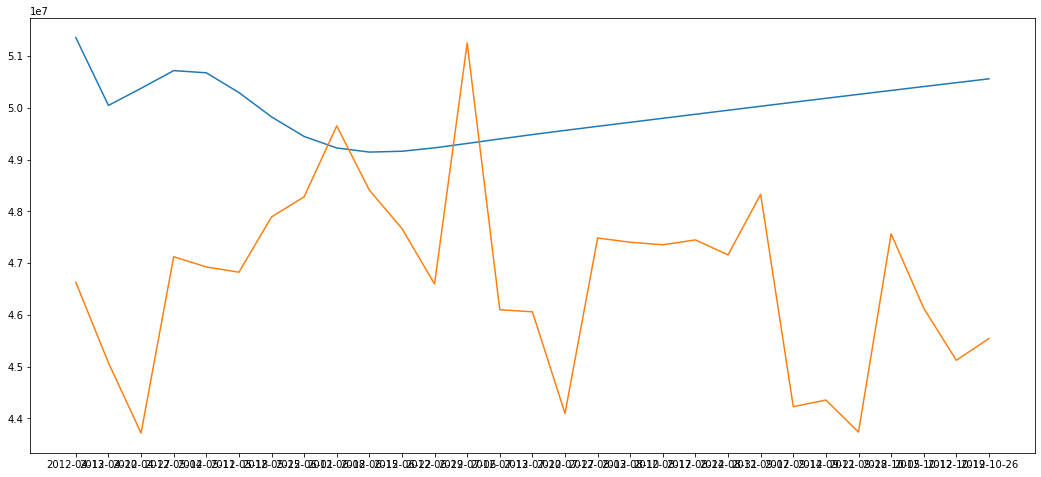

In [80]:
plt.plot(pred.Weekly_Sales)
plt.plot(valid.Weekly_Sales)

In [81]:
from math import sqrt
from sklearn.metrics import mean_squared_error
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Store is :  841.3835420096335
rmse value for Dept is :  2039.6651332476433
rmse value for Weekly_Sales is :  3830801.5368986395
rmse value for IsHoliday_x is :  579.6616201145346
rmse value for Temperature is :  50529.69622447192
rmse value for Fuel_Price is :  1122.7214627779092
rmse value for MarkDown1 is :  13728866.999546822
rmse value for MarkDown2 is :  15292776.839473303
rmse value for MarkDown3 is :  11736167.444716966
rmse value for MarkDown4 is :  8308729.801820982
rmse value for MarkDown5 is :  6628058.599084829
rmse value for CPI is :  11235.947184744295
rmse value for Unemployment is :  319.0491044585516
rmse value for Size is :  4406012.472766806


In [82]:
print(model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, Jun, 2019
Time:                     13:38:22
--------------------------------------------------------------------
No. of Equations:         14.0000    BIC:                    304.528
Nobs:                     113.000    HQIC:                   301.517
Log likelihood:          -18954.2    FPE:               1.15695e+130
AIC:                      299.460    Det(Omega_mle):    2.02057e+129
--------------------------------------------------------------------
Results for equation Store
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const               40090.978739      7046.666587            5.689           0.000
L1.Store                0.052206         0.185573            0.281           0.778
L1.Dept                -0.137020         0.072779   

In [83]:
t = df_new.groupby('Date').sum().reset_index()
t = t.set_index('Date')
t.index.name = 'Date'
#make final predictions
model = VAR(endog=t)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[ 6.57640605e+04  1.30753332e+05  4.27330528e+07  5.78630330e+01
   1.77600887e+05  1.13398348e+04  2.50527260e+07  1.36773276e+06
  -1.67687638e+06  9.89497750e+06  1.09086287e+07  5.21190035e+05
   2.05539129e+04  4.02462008e+08]]


/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
/home/laguna/anaconda3/envs/fbp/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


VAR is advanced technique which forecasts using time dependant and independant parameters.Have not tweeked into parameters,thus there is  a huge gap in predicted and foreacasted sales.